<a href="https://colab.research.google.com/github/karahokenstad/heat_flow_apparatus/blob/main/magnetization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [1]:
!pip install whit-phys-util

     |████████████████████████████████| 10.1MB 10.4MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const

Mounted at /content/drive


# Connect to GitHub

In [14]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/magnetization-part-1-karahokenstad")

Repository exists at this location. Pulling changes from GitHub.


# Air-filled solenoid

In [121]:
N_inner = 235 # turns for inner solenoid
N_outer = 2920 # for outer solenoid
n_inner = N_inner/0.12 # turns/m
n_outer = N_outer/0.11
R_inner = 0.00723 # between 0.0085 and 0.00052
R_outer = 0.012 # between 0.0175 and 0.0099
A_inner = np.pi*R_inner**2 # m^2
A_outer = np.pi*R_outer**2

In [122]:
df_air = pd.read_csv('air_filled_emf.csv')
df_air['H (A/m)'] = n_inner*df_air['Current (A)']
df_air['dB0 (T)'] = df_air['EMF Integral (V*s)']/(N_outer*A_inner)
df_air['B0 (T)'] = 0.0
for i in range(1,df_air['B0 (T)'].size):
  df_air.loc[i, 'B0 (T)'] = df_air.loc[i-1, 'B0 (T)'] + df_air.loc[i, 'dB0 (T)']

In [123]:
fitTable_air, fitFunc_air = buc.prettyPolyFit(df_air['H (A/m)'], df_air['B0 (T)'])
fitTable_air

,slope,intercept
value,1.255038e-06,-0.000883
uncertainty,1.231804e-08,0.000042


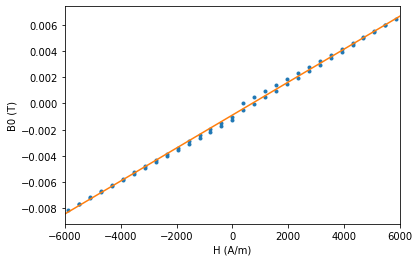

In [124]:
fig, ax = plt.subplots()
ax.plot(df_air['H (A/m)'], df_air['B0 (T)'],'.');
ax.set_xlabel("H (A/m)");
ax.set_ylabel("B0 (T)");
ax.set_xlim(-6000,6000);
#ax.set_ylim(-0.0025,0.0025);
H_fit = np.linspace(-6000,6000,2)
ax.plot(H_fit, fitFunc_air(H_fit));

In [127]:
print("The slope is (%.1f ± %.1f)*10^-7 T*m/A" % tuple(fitTable_air['slope']*10**7))
print("The intercept is (%.0f ± %.0f)*10^-5 T" % tuple(fitTable_air['intercept']*10**5))

The slope is (12.6 ± 0.1)*10^-7 T*m/A
The intercept is (-88 ± 4)*10^-5 T


# Iron-filled solenoid